# Analysis of eq potential temperature

## Necessary libraries

In [1]:
# Libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import pandas as pd
import array as ar
import matplotlib.patches as mpatches
import cartopy.feature as cf

import metpy
from metpy.units import units #had to install metpy
import wrf #had to install to have wrf-python things for vertical levels
import metpy.calc as mpcalc 

import matplotlib.dates as mdates # formatting heatmaps
import datetime
from matplotlib.ticker import MaxNLocator, FuncFormatter, ScalarFormatter

## Datasets

In [2]:
# define main paths for observations and reanalysis + for simulations
obs_path = '/media/irene/Elements/Laptop_dec2023/Thesis_data/sobs/'
sim_path = '/media/irene/Elements/wrf_micro_snow/'

In [3]:
# Open datasets:
# ERA5
ds_ERA = xr.open_dataset(f'{obs_path}/ERA5-WTQ-SNOWcase.nc') #with range lat:25-40, lon:70-115 and days 2008-July 14 to 24

#WRF (regridded to ERA5 horizontal spatial resolution)
ds_qtho, ds_ttho  = xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_QV-4to9.nc'), xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_TH-4to9.nc')
ds_qmor, ds_tmor = xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_QV-4to9.nc'), xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_TH-4to9.nc')
ds_qcam, ds_tcam = xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_QV-4to9.nc'), xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_TH-4to9.nc')
ds_qylin, ds_tylin = xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_QV-4to9.nc'), xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_TH-4to9.nc') 
ds_qwdm7, ds_twdm7 = xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_QV-4to9.nc'), xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_TH-4to9.nc')
ds_qwdm6, ds_twdm6 = xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_QV-4to9.nc'), xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_TH-4to9.nc')


#to compute pressure levels need P and PB of WRF (already regridded to ERA5 lat and lon)
ds_Ptho, ds_PBtho = xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_P-4to9.nc'), xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_PB-4to9.nc')
ds_Pmor, ds_PBmor = xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_P-4to9.nc'), xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_PB-4to9.nc')
ds_Pcam, ds_PBcam = xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_P-4to9.nc'), xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_PB-4to9.nc')
ds_Pylin, ds_PBylin = xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_P-4to9.nc'), xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_PB-4to9.nc')
ds_Pwdm7, ds_PBwdm7 = xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_P-4to9.nc'), xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_PB-4to9.nc')
ds_Pwdm6, ds_PBwdm6 = xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_P-4to9.nc'), xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_PB-4to9.nc')

## Cut spatial and temporal domain

In [4]:
# Cut time:
start = '2018-10-04T00:00:00.000000000'
end = '2018-10-09T23:00:00.000000000'
ds_ERA = ds_ERA.sel(time=slice(start, end))

#define time:
times=['2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09']

In [5]:
# Define Sichuan Basin
lat1, lat2 = 27, 35
lon1, lon2 = 90, 105

#cut w,theta and q
ds_ERAc = ds_ERA.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_tthoc = ds_ttho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_tmorc = ds_tmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_tcamc = ds_tcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_tylinc = ds_tylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_twdm7c = ds_twdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_twdm6c = ds_twdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

ds_qthoc = ds_qtho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qmorc = ds_qmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qcamc = ds_qcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qylinc = ds_qylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qwdm7c = ds_qwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_qwdm6c = ds_qwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

#cut variables for vertical levels
ds_Pthoc, ds_PBthoc = ds_Ptho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBtho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pmorc, ds_PBmorc = ds_Pmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pcamc, ds_PBcamc = ds_Pcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBcam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pylinc, ds_PBylinc = ds_Pylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pwdm7c, ds_PBwdm7c = ds_Pwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_Pwdm6c, ds_PBwdm6c = ds_Pwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2)), ds_PBwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

## Prepare data

In [6]:
# potential temperature of ERA5
meanl_tERA = (ds_ERAc.t).mean(dim=('latitude', 'longitude', 'time')) #temperature in kelvin
meanl_thERA = metpy.calc.potential_temperature(ds_ERA.level * units.hPa, meanl_tERA * units.kelvin)

meanl_qERA = (ds_ERAc.q).mean(dim=('latitude', 'longitude', 'time')) #q in kg/kg

In [7]:
# Compute pressure levels of wrf variables (to convert from wrf vertical coordinate system to ERA5 vertical coordinates)
thopr_lev = (ds_Pthoc.P + ds_PBthoc.PB)/100 #/100 is to have it in hPa
morpr_lev = (ds_Pmorc.P + ds_PBmorc.PB)/100 
campr_lev = (ds_Pcamc.P + ds_PBcamc.PB)/100
ylinpr_lev = (ds_Pylinc.P + ds_PBylinc.PB)/100
wdm7pr_lev = (ds_Pwdm7c.P + ds_PBwdm7c.PB)/100
wdm6pr_lev = (ds_Pwdm6c.P + ds_PBwdm6c.PB)/100

In [8]:
# Mean over time to be able to interpolate (cause interpolation is max for 3D variables)
thoprt_lev = thopr_lev.mean(dim=('XTIME'))
morprt_lev = morpr_lev.mean(dim=('XTIME'))
camprt_lev = campr_lev.mean(dim=('XTIME'))
ylinprt_lev = ylinpr_lev.mean(dim=('XTIME'))
wdm7prt_lev = wdm7pr_lev.mean(dim=('XTIME'))
wdm6prt_lev = wdm6pr_lev.mean(dim=('XTIME'))

In [9]:
# Average over time to interpolate vertical levels for graphs
meant_tERA = (ds_ERAc.t).mean('time') #one is enough, no need to do it also for w and q for era

meant_ttho = ds_tthoc.mean('XTIME')
meant_qtho = ds_qthoc.mean('XTIME')

meant_tmor = ds_tmorc.mean('XTIME')
meant_qmor = ds_qmorc.mean('XTIME')

meant_tcam = ds_tcamc.mean('XTIME')
meant_qcam = ds_qcamc.mean('XTIME')

meant_tylin = ds_tylinc.mean('XTIME')
meant_qylin = ds_qylinc.mean('XTIME')

meant_twdm7 = ds_twdm7c.mean('XTIME')
meant_qwdm7 = ds_qwdm7c.mean('XTIME')

meant_twdm6 = ds_twdm6c.mean('XTIME')
meant_qwdm6 = ds_qwdm6c.mean('XTIME')

Note: 
- problem with interpolation cause it needs 3D datasets but our are 4D. So do the mean overtime
- not all levels of ERA5 used cause of min and max of WRF: from 30 to 875 hPa (25 levels)

In [10]:
# 3D interpolation: but problem with time -> mean over time + not all levels because of min and max levels of WRF
ulev=[30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]

 # missing 30,50,70,100,125,150,175,200,225,250,
dsi_tthoc = wrf.interplevel(meant_ttho.T, thoprt_lev, ulev)
dsi_qthoc = wrf.interplevel(meant_qtho.QVAPOR, thoprt_lev, ulev)

dsi_tmorc = wrf.interplevel(meant_tmor.T, morprt_lev, ulev)
dsi_qmorc = wrf.interplevel(meant_qmor.QVAPOR, morprt_lev, ulev)

dsi_tcamc = wrf.interplevel(meant_tcam.T, camprt_lev, ulev)
dsi_qcamc = wrf.interplevel(meant_qcam.QVAPOR, camprt_lev, ulev)

dsi_tylinc = wrf.interplevel(meant_tylin.T, ylinprt_lev, ulev)
dsi_qylinc = wrf.interplevel(meant_qylin.QVAPOR, ylinprt_lev, ulev)

dsi_twdm7c = wrf.interplevel(meant_twdm7.T, wdm7prt_lev, ulev)
dsi_qwdm7c = wrf.interplevel(meant_qwdm7.QVAPOR, wdm7prt_lev, ulev)

dsi_twdm6c = wrf.interplevel(meant_twdm6.T, wdm6prt_lev, ulev)
dsi_qwdm6c = wrf.interplevel(meant_qwdm6.QVAPOR, wdm6prt_lev, ulev)

# Select ERA5 select levels shared with WRF
imeanl_tERA = meanl_thERA.sel(level=ulev)
imeanl_qERA = meanl_qERA.sel(level=ulev)

In [11]:
# Mean over 2d space for interpolated values to have graphs level vs variable value
imeanl_ttho = dsi_tthoc.mean(dim=('latitude', 'longitude'))
imeanl_qtho = dsi_qthoc.mean(dim=('latitude', 'longitude'))

imeanl_tmor = dsi_tmorc.mean(dim=('latitude', 'longitude'))
imeanl_qmor = dsi_qmorc.mean(dim=('latitude', 'longitude'))

imeanl_tcam = dsi_tcamc.mean(dim=('latitude', 'longitude'))
imeanl_qcam = dsi_qcamc.mean(dim=('latitude', 'longitude'))

imeanl_tylin = dsi_tylinc.mean(dim=('latitude', 'longitude'))
imeanl_qylin = dsi_qylinc.mean(dim=('latitude', 'longitude'))

imeanl_twdm7 = dsi_twdm7c.mean(dim=('latitude', 'longitude'))
imeanl_qwdm7 = dsi_qwdm7c.mean(dim=('latitude', 'longitude'))

imeanl_twdm6 = dsi_twdm6c.mean(dim=('latitude', 'longitude'))
imeanl_qwdm6 = dsi_qwdm6c.mean(dim=('latitude', 'longitude'))

## Compute equivalent potential temperature

In [12]:
def equivalent_potential_temperature(pressure_hPa, theta, qvapor):
    """
    Compute equivalent potential temperature (theta_e) from
    pressure (hPa), potential temperature (K), and water vapor mixing ratio (kg/kg).
    
    Parameters:
        pressure_hPa: List or NumPy array of pressure values (hPa)
        theta: List or NumPy array of potential temperature values (K)
        qvapor: List or NumPy array of water vapor mixing ratios (kg/kg)
    
    Returns:
        NumPy array of equivalent potential temperatures (K)
    """
    # Convert inputs to NumPy arrays to enable element-wise operations
    pressure_hPa = np.array(pressure_hPa, dtype=np.float64)
    theta = np.array(theta, dtype=np.float64)
    qvapor = np.array(qvapor, dtype=np.float64)

    # Constants
    Lv = 2.5e6  # Latent heat of vaporization (J/kg)
    cp = 1005   # Specific heat at constant pressure (J/kg/K)
    Rd = 287.05 # Gas constant for dry air (J/kg/K)

    # Reference pressure in hPa
    p0_hPa = 1000  # Standard reference pressure in hPa

    # Compute temperature from potential temperature
    T = theta * (pressure_hPa / p0_hPa) ** (Rd / cp)

    # Compute equivalent potential temperature
    theta_e = theta * np.exp((Lv * qvapor) / (cp * T))

    return theta_e  # Returns a NumPy array

In [13]:
uu = [30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875]
p = imeanl_ttho.level.sel(level=uu)

theta_ERA = imeanl_tERA.sel(level=uu)
theta_tho = imeanl_ttho.sel(level=uu) +300
theta_mor = imeanl_tmor.sel(level=uu) +300
theta_cam = imeanl_tcam.sel(level=uu) +300
theta_ylin = imeanl_tylin.sel(level=uu) +300
theta_wdm7 = imeanl_twdm7.sel(level=uu) +300
theta_wdm6 = imeanl_twdm6.sel(level=uu) +300

qv_ERA = imeanl_qERA.sel(level=uu)
qv_tho = imeanl_qtho.sel(level=uu)
qv_mor = imeanl_qmor.sel(level=uu)
qv_cam = imeanl_qcam.sel(level=uu)
qv_ylin = imeanl_qylin.sel(level=uu)
qv_wdm7 = imeanl_qwdm7.sel(level=uu)
qv_wdm6 = imeanl_qwdm6.sel(level=uu)

In [14]:
eth_ERA = equivalent_potential_temperature(p, theta_ERA, qv_ERA)
eth_tho = equivalent_potential_temperature(p, theta_tho, qv_tho)
eth_mor = equivalent_potential_temperature(p, theta_mor, qv_mor)
eth_cam = equivalent_potential_temperature(p, theta_cam, qv_cam)
eth_ylin = equivalent_potential_temperature(p, theta_ylin, qv_ylin)
eth_wdm7 = equivalent_potential_temperature(p, theta_wdm7, qv_wdm7)
eth_wdm6 = equivalent_potential_temperature(p, theta_wdm6, qv_wdm6)

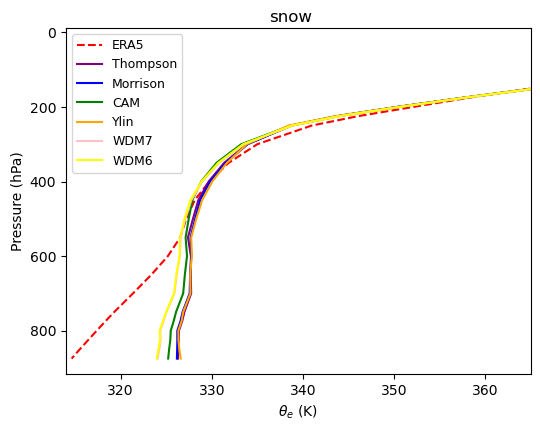

In [15]:
# Graph 
nrows, ncols = 1,1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6,4.5))
fig.suptitle('snow', y=0.92)

#
axs.plot(eth_ERA, p.level, linestyle='dashed', color='r', label='ERA5')
axs.plot(eth_tho, p.level, color='purple', label='Thompson')
axs.plot(eth_mor, p.level, color='b', label='Morrison')
axs.plot(eth_cam, p.level, color='green', label='CAM')
axs.plot(eth_ylin, p.level, color='orange', label='Ylin')
axs.plot(eth_wdm7, p.level, color='pink', label='WDM7')
axs.plot(eth_wdm6, p.level, color='yellow', label='WDM6')

axs.set_xlabel(r'$\theta_e$ (K)') 
axs.set_ylabel('Pressure (hPa)')
axs.invert_yaxis() #to invert y axis: 1000 hPa is rougly sea level = 0 height
axs.legend(fontsize=9)
axs.set_xlim(314, 365)

# Save the plot as a hd file
plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_paper_hd/eth-profile-snow.png', dpi=400, bbox_inches='tight')

In [16]:
eth_ERA_mcs = [597.19165452, 495.8315734 , 433.01327675, 384.05914076,
       368.72048839, 362.1996661 , 358.83485854, 356.85082402,
       355.23478714, 353.66215746, 350.4029587 , 346.97879952,
       343.90997345, 341.66489875, 340.58838663, 340.29174824,
       340.57793982, 341.45938492, 342.3177175 , 343.08497425,
       343.35866569, 343.53519653, 343.6624268 , 343.67976246,
       343.5611818 , 343.30941319, 342.88715887, 342.42593974,
       341.81524723]
eth_tho_mcs = [597.54618521, 495.93792167, 435.15263523, 386.27338843,
       368.95875374, 361.20191183, 357.17882075, 354.66331759,
       352.79856571, 351.31979119, 348.75477131, 346.27535247,
       343.95034349, 342.07930028, 340.86110993, 340.26699048,
       339.96583839, 339.90860871, 341.11828582, 343.37809903,
       344.77405694, 346.21992279, 347.64664138, 348.97593933,
       349.95785352, 350.67543772, 351.23803525, 351.50254676,
       351.16964812]
eth_mor_mcs = [597.4707973 , 495.82939608, 434.94603657, 385.61194026,
       368.58800476, 361.33374179, 357.52721331, 355.12737471,
       353.25882828, 351.71210203, 348.99167403, 346.40491044,
       344.01385613, 342.08576713, 340.87229942, 340.37030341,
       340.21717117, 340.19930826, 341.40273944, 343.61234685,
       344.9724788 , 346.3826072 , 347.80850155, 349.17876184,
       350.22836066, 350.99280137, 351.55813279, 351.83631533,
       351.45103758]
eth_cam_mcs = [597.56446548, 496.06727736, 435.295215  , 386.83419853,
       369.68321705, 361.4017934 , 356.81793568, 353.87309192,
       351.71926362, 350.09038484, 347.52706121, 345.22404373,
       343.23600476, 341.87789085, 341.19585672, 341.1001157 ,
       341.29633281, 341.64903056, 342.84579316, 344.30705674,
       345.13715159, 346.00602622, 346.92870096, 347.9064171 ,
       348.70134025, 349.35778562, 349.92119612, 350.34803761,
       350.14344208]
eth_ylin_mcs = [597.48974691, 495.89128286, 435.16842539, 385.53680365,
       368.97821697, 361.78769356, 357.90208174, 355.44175797,
       353.47926725, 351.79455077, 348.8945832 , 346.05132439,
       343.36808526, 341.21731228, 339.88240667, 339.33667853,
       339.23153566, 339.28935506, 340.36164023, 342.27677769,
       343.4729551 , 344.73525607, 346.05470433, 347.36350664,
       348.40846057, 349.20488732, 349.81410139, 350.29640141,
       350.31609261]
eth_wdm7_mcs = [597.58933929, 496.04815828, 435.31376019, 386.62249238,
       369.54230909, 361.39841589, 356.89961159, 354.03595145,
       351.9423774 , 350.33862663, 347.77120477, 345.44985476,
       343.36766638, 341.73154011, 340.76418508, 340.49520971,
       340.47122502, 340.36554442, 341.26496396, 343.08072626,
       344.22583964, 345.41714187, 346.5763528 , 347.61140184,
       348.35134354, 348.84799648, 349.22943839, 349.46021084,
       349.17542542]
eth_wdm6_mcs =  [597.5838857 , 496.08300085, 435.41614694, 386.96161323,
       369.82778131, 361.48426661, 356.85397865, 353.89903892,
       351.74025034, 350.09849198, 347.48760599, 345.16714598,
       343.13039779, 341.57162359, 340.66472464, 340.42249685,
       340.46148557, 340.47460394, 341.38958825, 343.14026635,
       344.27871458, 345.4658898 , 346.60800964, 347.60663076,
       348.31833474, 348.78032558, 349.14416402, 349.45586819,
       349.32003931]

In [17]:
p_mcs = [30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875,900,925,950,975]

(336.0, 380.0)

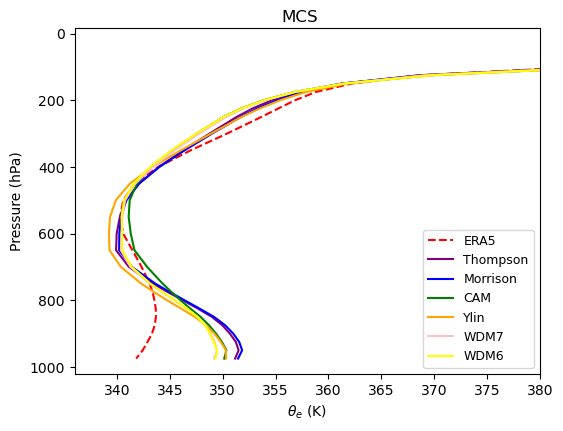

In [18]:
# Graph 
nrows, ncols = 1,1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6,4.5))
fig.suptitle('MCS', y=0.92)

#
axs.plot(eth_ERA_mcs, p_mcs, linestyle='dashed', color='r', label='ERA5')
axs.plot(eth_tho_mcs, p_mcs, color='purple', label='Thompson')
axs.plot(eth_mor_mcs, p_mcs, color='b', label='Morrison')
axs.plot(eth_cam_mcs, p_mcs, color='green', label='CAM')
axs.plot(eth_ylin_mcs, p_mcs, color='orange', label='Ylin')
axs.plot(eth_wdm7_mcs, p_mcs, color='pink', label='WDM7')
axs.plot(eth_wdm6_mcs, p_mcs, color='yellow', label='WDM6')

axs.set_xlabel(r'$\theta_e$ (K)') 
axs.set_ylabel('Pressure (hPa)')
axs.invert_yaxis() #to invert y axis: 1000 hPa is rougly sea level = 0 height
axs.legend(fontsize=9)
axs.set_xlim(336, 380)

# Save the plot as a hd file

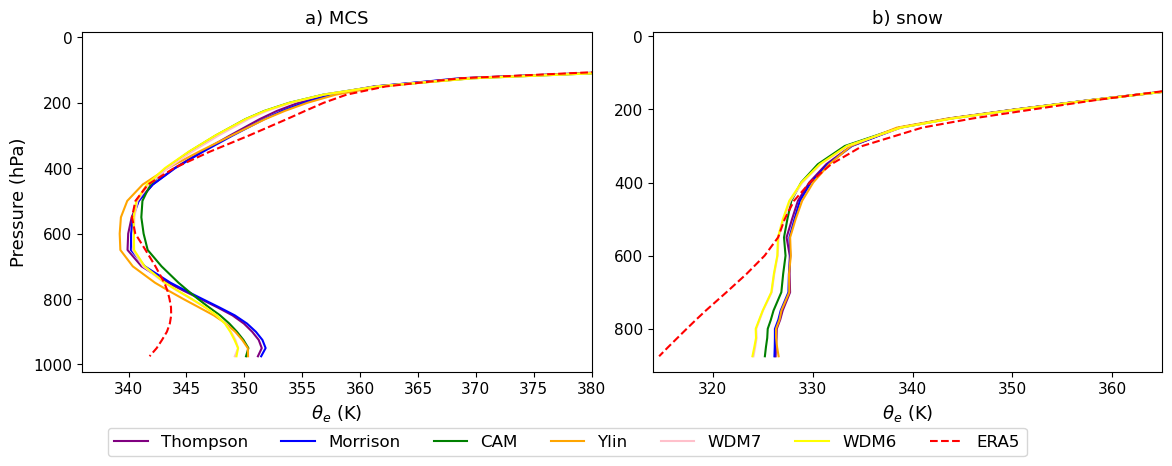

In [19]:
# Timeseries of CAPE for mcs and snow
nrows, ncols = 1,2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,4))
axs = axs.flatten()

#
axs[0].plot(eth_tho_mcs, p_mcs, color='purple', label='Thompson')
axs[0].plot(eth_mor_mcs, p_mcs, color='b', label='Morrison')
axs[0].plot(eth_cam_mcs, p_mcs, color='green', label='CAM')
axs[0].plot(eth_ylin_mcs, p_mcs, color='orange', label='Ylin')
axs[0].plot(eth_wdm7_mcs, p_mcs, color='pink', label='WDM7')
axs[0].plot(eth_wdm6_mcs, p_mcs, color='yellow', label='WDM6')
axs[0].plot(eth_ERA_mcs, p_mcs, linestyle='dashed', color='r', label='ERA5')

axs[0].tick_params(axis='y', labelsize=11)
axs[0].tick_params(axis='x', labelsize=11)
axs[0].set_title('a) MCS', fontsize=13)
axs[0].set_xlabel(r'$\theta_e$ (K)', fontsize=13) 
axs[0].set_ylabel('Pressure (hPa)', fontsize=13)
axs[0].invert_yaxis()
axs[0].set_xlim(336, 380)

#
axs[1].plot(eth_tho, p.level, color='purple', label='Thompson')
axs[1].plot(eth_mor, p.level, color='b', label='Morrison')
axs[1].plot(eth_cam, p.level, color='green', label='CAM')
axs[1].plot(eth_ylin, p.level, color='orange', label='Ylin')
axs[1].plot(eth_wdm7, p.level, color='pink', label='WDM7')
axs[1].plot(eth_wdm6, p.level, color='yellow', label='WDM6')
axs[1].plot(eth_ERA, p.level, linestyle='dashed', color='r', label='ERA5')

axs[1].tick_params(axis='y', labelsize=11)
axs[1].tick_params(axis='x', labelsize=11)
axs[1].set_title('b) snow', fontsize=13)
axs[1].set_xlabel(r'$\theta_e$ (K)', fontsize=13) 
axs[1].invert_yaxis()
axs[1].set_xlim(314, 365)
axs[1].legend(loc='upper right', ncol=7, bbox_to_anchor=(0.75, -0.14), fontsize=12)


plt.tight_layout()
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.12, hspace=0.25)

#plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission/theta_e.png', dpi=400, bbox_inches='tight');

plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission_svg/theta_e-svg.svg', format='svg', dpi=400, bbox_inches='tight')


## Vertical profile with time only for Sichuan Basin

In [20]:
# Mean over 2d space to have vertical level and time
means_tERA = (ds_ERAc.t).mean(dim=('latitude', 'longitude')) # temperature in kelvin
means_qERA = (ds_ERAc.q).mean(dim=('latitude', 'longitude')) #q in kg/kg

#compute potential temperature of ERA5
means_thERA = metpy.calc.potential_temperature(ds_ERA.level* units.hPa, means_tERA * units.kelvin)
means_thERA = means_thERA.sel(level=ulev)

means_qERA = means_qERA.sel(level=ulev).T

In [21]:
# Transpose to have time and levels in the right order for graphs
q_st = means_qERA.transpose(transpose_coords=True, missing_dims='raise')

# Select shared levels of ERA5 and WRF
q_st = q_st.sel(level=ulev)
means_thERA = means_thERA.sel(level=ulev)

In [22]:
# Mean over 2d space of T
means_ttho = (ds_tthoc.T).mean(dim=('latitude', 'longitude'))+300 #300 is base state pot temp
means_tmor = (ds_tmorc.T).mean(dim=('latitude', 'longitude'))+300
means_tcam = (ds_tcam.T).mean(dim=('latitude', 'longitude'))+300
means_tylin = (ds_tylinc.T).mean(dim=('latitude', 'longitude'))+300
means_twdm7 = (ds_twdm7c.T).mean(dim=('latitude', 'longitude'))+300
means_twdm6 = (ds_twdm6c.T).mean(dim=('latitude', 'longitude'))+300

# Mean over 2d space of QVAPOR
means_qtho = (ds_qthoc.QVAPOR).mean(dim=('latitude', 'longitude'))
means_qmor = (ds_qmorc.QVAPOR).mean(dim=('latitude', 'longitude'))
means_qcam = (ds_qcamc.QVAPOR).mean(dim=('latitude', 'longitude'))
means_qylin = (ds_qylinc.QVAPOR).mean(dim=('latitude', 'longitude'))
means_qwdm7 = (ds_qwdm7c.QVAPOR).mean(dim=('latitude', 'longitude'))
means_qwdm6 = (ds_qwdm6c.QVAPOR).mean(dim=('latitude', 'longitude'))

In [23]:
# Transpose to have the time on x axis and levels on y
ttho_st = means_ttho.transpose(transpose_coords=True, missing_dims='raise')
tmor_st = means_tmor.transpose(transpose_coords=True, missing_dims='raise')
tcam_st = means_tcam.transpose(transpose_coords=True, missing_dims='raise')
tylin_st = means_tylin.transpose(transpose_coords=True, missing_dims='raise')
twdm7_st = means_twdm7.transpose(transpose_coords=True, missing_dims='raise')
twdm6_st = means_twdm6.transpose(transpose_coords=True, missing_dims='raise')

# Transpose to have the time on x axis and levels on y
qtho_st = means_qtho.transpose(transpose_coords=True, missing_dims='raise')
qmor_st = means_qmor.transpose(transpose_coords=True, missing_dims='raise')
qcam_st = means_qcam.transpose(transpose_coords=True, missing_dims='raise')
qylin_st = means_qylin.transpose(transpose_coords=True, missing_dims='raise')
qwdm7_st = means_qwdm7.transpose(transpose_coords=True, missing_dims='raise')
qwdm6_st = means_qwdm6.transpose(transpose_coords=True, missing_dims='raise')

### Heatmaps with interpolated levels of W

In [24]:
# Mean over latitude to be able to interpolate (3d datasets) - this is for levels (don't have to do it again)
thoprla_lev = thopr_lev.mean(dim=('latitude'))
morprla_lev = morpr_lev.mean(dim=('latitude'))
camprla_lev = campr_lev.mean(dim=('latitude'))
ylinprla_lev = ylinpr_lev.mean(dim=('latitude'))
wdm7prla_lev = wdm7pr_lev.mean(dim=('latitude'))
wdm6prla_lev = wdm6pr_lev.mean(dim=('latitude'))

# Transpose to have bottom_top as first to be able to interpolate
thoprla_lev = thoprla_lev.transpose('bottom_top','XTIME','longitude')
morprla_lev = morprla_lev.transpose('bottom_top','XTIME','longitude')
camprla_lev = camprla_lev.transpose('bottom_top','XTIME','longitude')
ylinprla_lev = ylinprla_lev.transpose('bottom_top','XTIME','longitude')
wdm7prla_lev = wdm7prla_lev.transpose('bottom_top','XTIME','longitude')
wdm6prla_lev = wdm6prla_lev.transpose('bottom_top','XTIME','longitude')

In [25]:
# Q mean over latitude for variable and levels to have 3d data to interpolate
meanla_qtho = (ds_qthoc.QVAPOR).mean(dim=('latitude'))
meanla_qmor = (ds_qmorc.QVAPOR).mean(dim=('latitude'))
meanla_qcam = (ds_qcamc.QVAPOR).mean(dim=('latitude'))
meanla_qylin = (ds_qylinc.QVAPOR).mean(dim=('latitude'))
meanla_qwdm7 = (ds_qwdm7c.QVAPOR).mean(dim=('latitude'))
meanla_qwdm6 = (ds_qwdm6c.QVAPOR).mean(dim=('latitude'))

# Change the order of dimensions to interpolate on levels (bottom_top has to be first)
meanla_qtho = meanla_qtho.transpose('bottom_top','XTIME','longitude')
meanla_qmor = meanla_qmor.transpose('bottom_top','XTIME','longitude')
meanla_qcam = meanla_qcam.transpose('bottom_top','XTIME','longitude')
meanla_qylin = meanla_qylin.transpose('bottom_top','XTIME','longitude')
meanla_qwdm7 = meanla_qwdm7.transpose('bottom_top','XTIME','longitude')
meanla_qwdm6 = meanla_qwdm6.transpose('bottom_top','XTIME','longitude')

# Interpolate 3d data
dsii_qthoc = wrf.interplevel(meanla_qtho, thoprla_lev, ulev)
dsii_qmorc = wrf.interplevel(meanla_qmor, morprla_lev, ulev)
dsii_qcamc = wrf.interplevel(meanla_qcam, camprla_lev, ulev)
dsii_qylinc = wrf.interplevel(meanla_qylin, ylinprla_lev, ulev)
dsii_qwdm7c = wrf.interplevel(meanla_qwdm7, wdm7prla_lev, ulev)
dsii_qwdm6c = wrf.interplevel(meanla_qwdm6, wdm6prla_lev, ulev)

# Mean over longitude to have levels vs time to have heatmaps
iimeanl_qtho = dsii_qthoc.mean(dim=('longitude'))
iimeanl_qmor = dsii_qmorc.mean(dim=('longitude'))
iimeanl_qcam = dsii_qcamc.mean(dim=('longitude'))
iimeanl_qylin = dsii_qylinc.mean(dim=('longitude'))
iimeanl_qwdm7 = dsii_qwdm7c.mean(dim=('longitude'))
iimeanl_qwdm6 = dsii_qwdm6c.mean(dim=('longitude'))

In [26]:
# T mean over latitude for variable and levels to have 3d data to interpolate
meanla_ttho = (ds_tthoc.T).mean(dim=('latitude'))+300
meanla_tmor = (ds_tmorc.T).mean(dim=('latitude'))+300
meanla_tcam = (ds_tcamc.T).mean(dim=('latitude'))+300
meanla_tylin = (ds_tylinc.T).mean(dim=('latitude'))+300
meanla_twdm7 = (ds_twdm7c.T).mean(dim=('latitude'))+300
meanla_twdm6 = (ds_twdm6c.T).mean(dim=('latitude'))+300

# Change the order of dimensions to interpolate on levels (bottom_top has to be first)
meanla_ttho = meanla_ttho.transpose('bottom_top','XTIME','longitude')
meanla_tmor = meanla_tmor.transpose('bottom_top','XTIME','longitude')
meanla_tcam = meanla_tcam.transpose('bottom_top','XTIME','longitude')
meanla_tylin = meanla_tylin.transpose('bottom_top','XTIME','longitude')
meanla_twdm7 = meanla_twdm7.transpose('bottom_top','XTIME','longitude')
meanla_twdm6 = meanla_twdm6.transpose('bottom_top','XTIME','longitude')

# Interpolate 3d data
dsii_tthoc = wrf.interplevel(meanla_ttho, thoprla_lev, ulev)
dsii_tmorc = wrf.interplevel(meanla_tmor, morprla_lev, ulev)
dsii_tcamc = wrf.interplevel(meanla_tcam, camprla_lev, ulev)
dsii_tylinc = wrf.interplevel(meanla_tylin, ylinprla_lev, ulev)
dsii_twdm7c = wrf.interplevel(meanla_twdm7, wdm7prla_lev, ulev)
dsii_twdm6c = wrf.interplevel(meanla_twdm6, wdm6prla_lev, ulev)

# Mean over longitude to have levels vs time to have heatmaps
iimeanl_ttho = dsii_tthoc.mean(dim=('longitude'))
iimeanl_tmor = dsii_tmorc.mean(dim=('longitude'))
iimeanl_tcam = dsii_tcamc.mean(dim=('longitude'))
iimeanl_tylin = dsii_tylinc.mean(dim=('longitude'))
iimeanl_twdm7 = dsii_twdm7c.mean(dim=('longitude'))
iimeanl_twdm6 = dsii_twdm6c.mean(dim=('longitude'))

In [27]:
prs = iimeanl_ttho.level
pressure = np.tile(prs, (144, 1))
pressures = pressure.T

prs2 = uu
pressure2 = np.tile(prs2, (144, 1))
pressures2 = pressure2.T

In [28]:
ii_eth_ERA = equivalent_potential_temperature(pressures, means_thERA, means_qERA)
ii_eth_tho = equivalent_potential_temperature(pressures, iimeanl_ttho, iimeanl_qtho)
ii_eth_mor = equivalent_potential_temperature(pressures, iimeanl_tmor, iimeanl_qmor)
ii_eth_cam = equivalent_potential_temperature(pressures, iimeanl_tcam, iimeanl_qcam)
ii_eth_ylin = equivalent_potential_temperature(pressures, iimeanl_tylin, iimeanl_qylin)
ii_eth_wdm7 = equivalent_potential_temperature(pressures, iimeanl_twdm7, iimeanl_qwdm7)
ii_eth_wdm6 = equivalent_potential_temperature(pressures, iimeanl_twdm6, iimeanl_qwdm6)

In [29]:
# For the plot: do averages over pressure levels and get daily average
lmean_eththo = np.mean(ii_eth_tho, axis=0) #first dimension is level and second is time
lmean_ethmor = np.mean(ii_eth_mor, axis=0)
lmean_ethcam = np.mean(ii_eth_cam, axis=0)
lmean_ethylin = np.mean(ii_eth_ylin, axis=0)
lmean_ethwdm7 = np.mean(ii_eth_wdm7, axis=0)
lmean_ethwdm6 = np.mean(ii_eth_wdm6, axis=0)
lmean_ethERA = np.mean(ii_eth_ERA, axis=0)

In [30]:
# Calculate daily mean and then plot 10 points
groupsc = [[lmean_eththo[x:x+24] for x in range(0, len(lmean_eththo), 24)], [lmean_ethmor[x:x+24] for x in range(0, len(lmean_ethmor), 24)], [lmean_ethcam[x:x+24] for x in range(0, len(lmean_ethcam), 24)], [lmean_ethylin[x:x+24] for x in range(0, len(lmean_ethylin), 24)], [lmean_ethwdm7[x:x+24] for x in range(0, len(lmean_ethwdm7), 24)], [lmean_ethwdm6[x:x+24] for x in range(0, len(lmean_ethwdm6), 24)], [lmean_ethERA[x:x+24] for x in range(0, len(lmean_ethERA), 24)]]

# Simple math to calculate the means
ethavgdaily = np.zeros((7,6))
for m in range(0,7): #number of datasets
 for i in range(0,6): #6 days
    ethavgdaily[m][i] = sum(groupsc[m][i])/24;

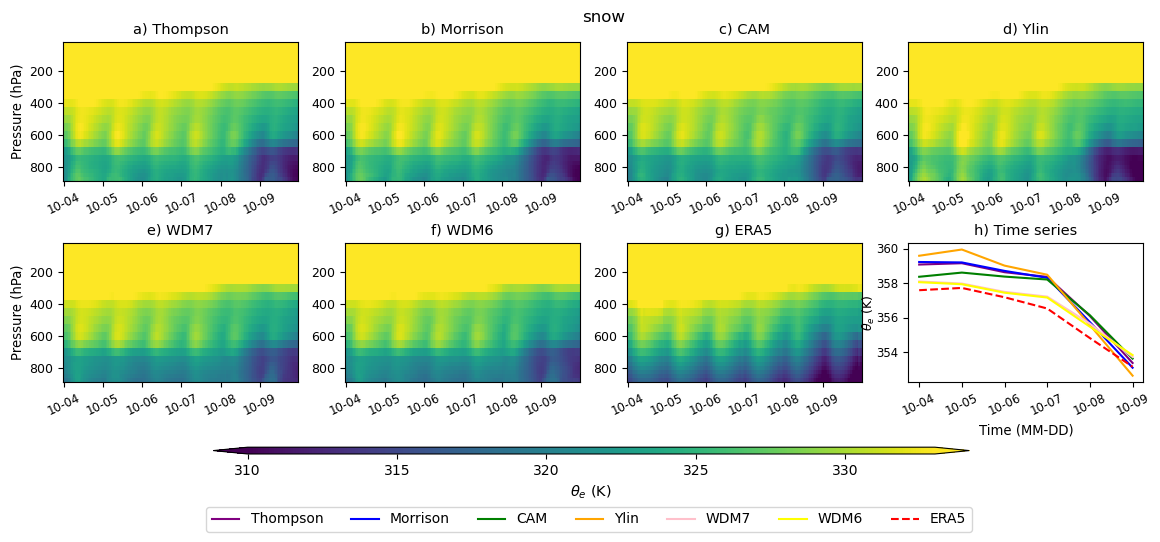

In [31]:
# Interpolated heatmaps for W 
ds = [ii_eth_tho, ii_eth_mor, ii_eth_cam, ii_eth_ylin, ii_eth_wdm7, ii_eth_wdm6, ii_eth_ERA]
titl=['a) Thompson', 'b) Morrison', 'c) CAM', 'd) Ylin', 'e) WDM7', 'f) WDM6', 'g) ERA5']

# create figure
fig, axs = plt.subplots(2, 4, figsize=(12, 4))
axs=axs.flatten()
fig.suptitle('snow', y=1.03)

# time formatting
time=['10-04', '10-05', '10-06', '10-07', '10-08', '10-09']
times=['2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09']
times = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in times]
date_format = mdates.DateFormatter('%m-%d')

# Create a normalized colormap centered at 0
norm = mcolors.TwoSlopeNorm(vmin=310, vmax=333, vcenter = 321.5)

for i in range(0,7):
    axs[i].xaxis.set_major_formatter(date_format)
    axs[i].tick_params(axis='x', labelrotation = 25)
    axs[i].tick_params(axis='x', labelsize=8.5)  
    axs[i].tick_params(axis='y', labelsize=9)
    heatmap = axs[i].pcolormesh(means_qERA.time, ulev, ds[i], cmap='viridis', norm=norm)
    axs[i].set_title(f'{(3*titl)[i]}', fontsize=10.5)
    axs[i].invert_yaxis()

axs[0].set_ylabel('Pressure (hPa)', fontsize=9.5)
axs[4].set_ylabel('Pressure (hPa)', fontsize=9.5)

# plot timeseries
axs[7].plot(time, ethavgdaily[0], color='purple', label='Thompson')
axs[7].plot(time, ethavgdaily[1], color='blue', label='Morrison')
axs[7].plot(time, ethavgdaily[2], color='green', label='CAM')
axs[7].plot(time, ethavgdaily[3], color='orange', label='Ylin')
axs[7].plot(time, ethavgdaily[4], color='pink', label='WDM7')
axs[7].plot(time, ethavgdaily[5], color='yellow', label='WDM6')
axs[7].plot(time, ethavgdaily[6], color='r', linestyle='dashed' ,label='ERA5')
axs[7].tick_params(axis='x', rotation=25, labelsize=8.5)
axs[7].tick_params(axis='y', labelsize=8.4)
axs[7].set_title('h) Time series', fontsize=10.5)
axs[7].set_ylabel(r'$\theta_e$ (K)', fontsize=9, labelpad=-0.5)
axs[7].set_xlabel(r'Time (MM-DD)', fontsize=9.5)


# Adjust layout to prevent clipping of axis labels
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.45)
# Add colorbar
cbar_ax = fig.add_axes([0.175, -0.08, 0.63, 0.017])
cbar=plt.colorbar(heatmap, cax=cbar_ax, orientation='horizontal', extend='both')
axs[7].legend(loc='upper right', ncol=7, bbox_to_anchor=(0.3, -0.85))
cbar.set_label(r'$\theta_e$ (K)', fontsize = 10.5)

# Save the plot as a hd file
plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_paper_hd/eth-snow.png', dpi=400, bbox_inches='tight')